In [1]:
# Data
no_reg_accuracies = {
    "DenseNet" : 31,
    "ResNet18" : 52,
    "ResNet34" : 23,
    "ResNet50" : 36,
    "VGG16" : 42,
    "MNASNet" : 17
}
val_accuracies = {
    "DenseNet" : 78,
    "ResNet18" : 76,
    "ResNet34" : 52,
    "ResNet50" : 68,
    "VGG16" : 85,
    "MNASNet" : 71
}
train_accuracies = {
    "DenseNet" : 99,
    "ResNet18" : 99,
    "ResNet34" : 98,
    "ResNet50" : 99,
    "VGG16" : 99,
    "MNASNet" : 99
}

# surprising that these are so cruddy

no_reg_balanced_accuracies = {
    "DenseNet" : 27,
    "ResNet18" : 36,
    "ResNet34" : 18,
    "ResNet50" : 33,
    "VGG16" : 41,
    "MNASNet" : 12,
    "Regularised\n VGG16" : 32   
}
# surprising that these are so cruddy

first_epoch_accuracies = {
    "DenseNet" : 44,
    "ResNet18" : 43,
    "ResNet34" : 17,
    "ResNet50" : 37,
    "VGG16" : 74,
    "MNASNet" : 21
}
# perhaps unsurprising that these are on the whole slightly less cruddy

reg_accuracies_vgg = {
    "0"     : 38,
    "0.005" : 18,
    "0.01"  : 38,
    "0.015" : 14,   # only predicting mr
    "0.02"  : 14,   # only predicting mr
}
# with hindsight, unsurprising that these are cruddy but the decisions were made 
# with emprical evidence so it isn't really my fault

# graphs to make
# Accuracy
# Balanced Accuracy
# Regularisation Accuracy
# First Epoch vs Fifth Epoch Accuracy

In [2]:
def bar_plot_dict(results, title, xlabel, ylabel, filename):
    plt.rcParams.update({"font.size":22})
    x = range(0, len(results))

    fig, ax = plt.subplots(figsize=(16,12))
    ax.bar(x, results.values())
    ax.set_xticks(x)
    ax.set_xticklabels(results.keys())
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    fig.suptitle(title, wrap=True)
    plt.savefig(filename)

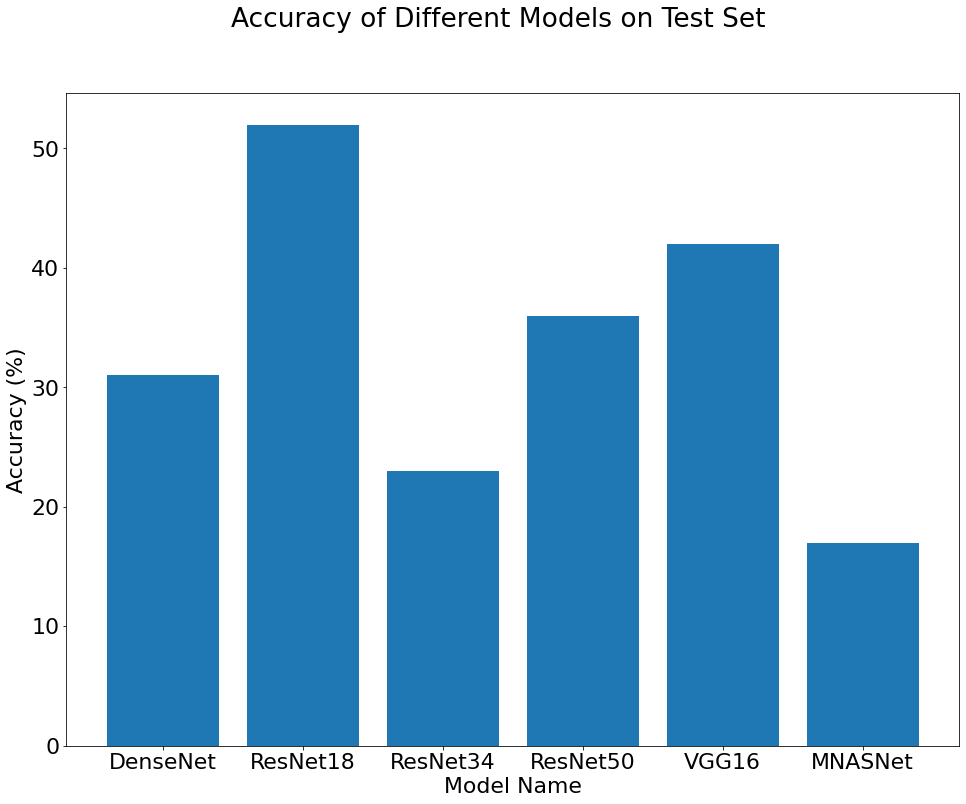

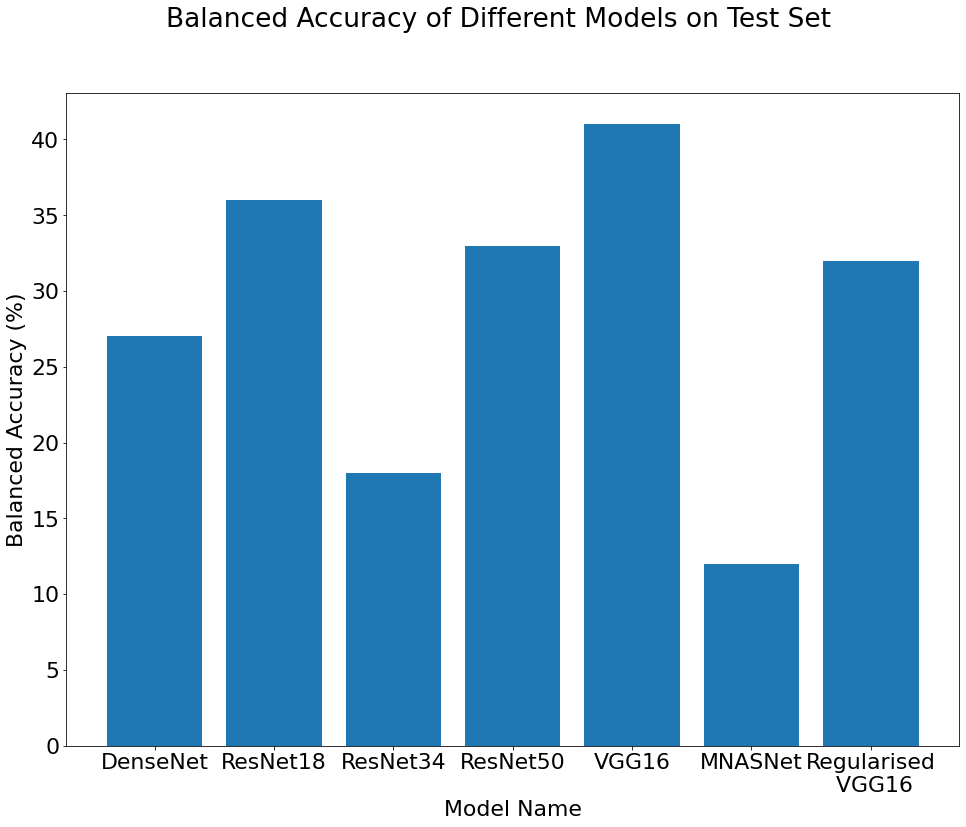

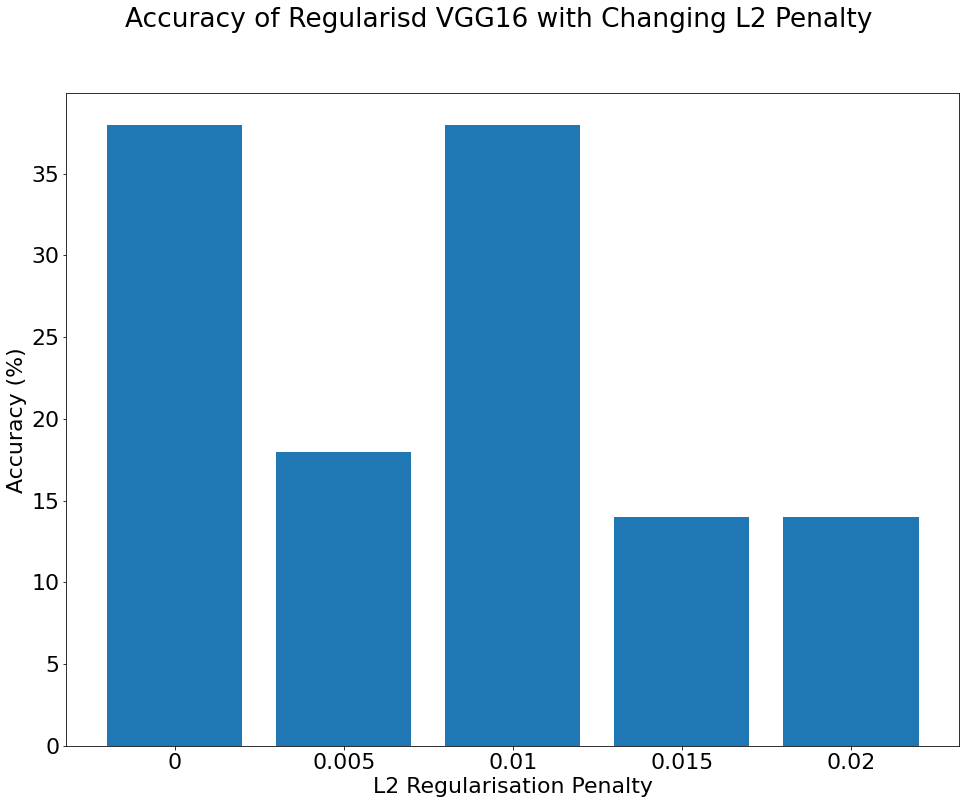

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bar_plot_dict(no_reg_accuracies, 
    "Accuracy of Different Models on Test Set", 
    "Model Name", 
    "Accuracy (%)", 
    "accuracies.png")
bar_plot_dict(no_reg_balanced_accuracies, 
    "Balanced Accuracy of Different Models on Test Set", 
    "Model Name", 
    "Balanced Accuracy (%)",
    "balanced-accuracies.png")
bar_plot_dict(reg_accuracies_vgg, 
    "Accuracy of Regularisd VGG16 with Changing L2 Penalty", 
    "L2 Regularisation Penalty", 
    "Accuracy (%)", 
    "reg-accuracies.png")


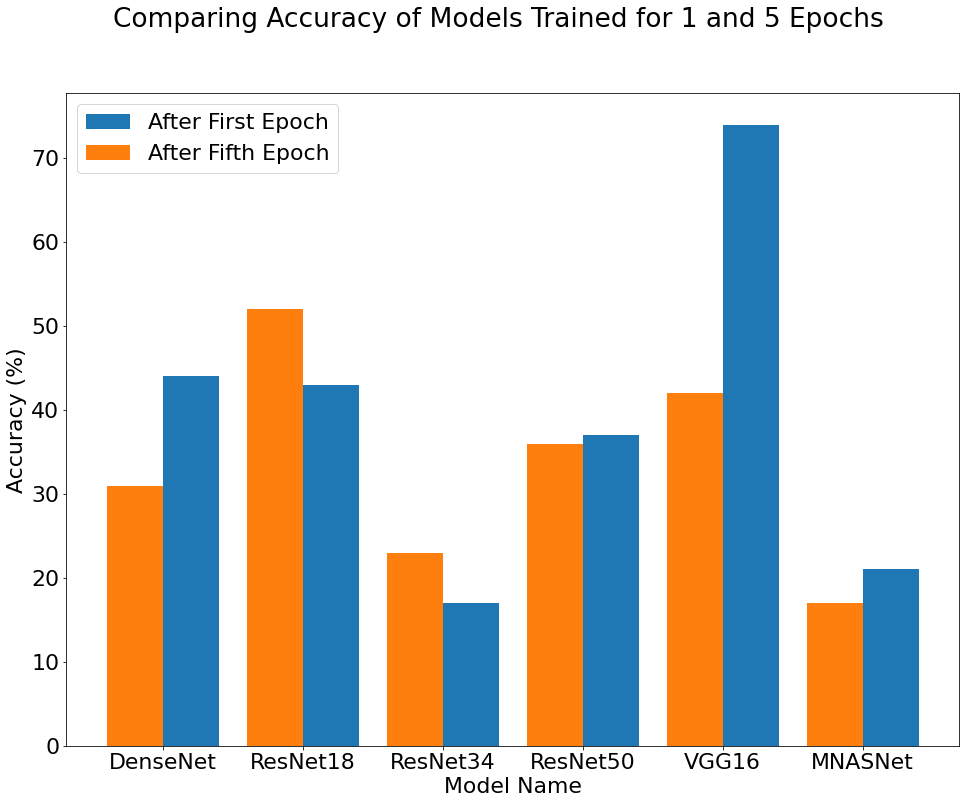

In [4]:
# fifth epoch accuracy vs 1st epoch accuracy
width = 0.4
x_ticks = np.arange(len(no_reg_accuracies))

fig, ax = plt.subplots(figsize=(16,12))
ax.bar(x_ticks + width / 2, first_epoch_accuracies.values(), width, label = "After First Epoch")
ax.bar(x_ticks - width / 2, no_reg_accuracies.values(), width, label = "After Fifth Epoch")
ax.set_xticks(x_ticks)
ax.set_xticklabels(no_reg_accuracies.keys())
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Model Name")
ax.legend()
fig.suptitle("Comparing Accuracy of Models Trained for 1 and 5 Epochs", wrap=True)
plt.savefig("first-epoch.png")

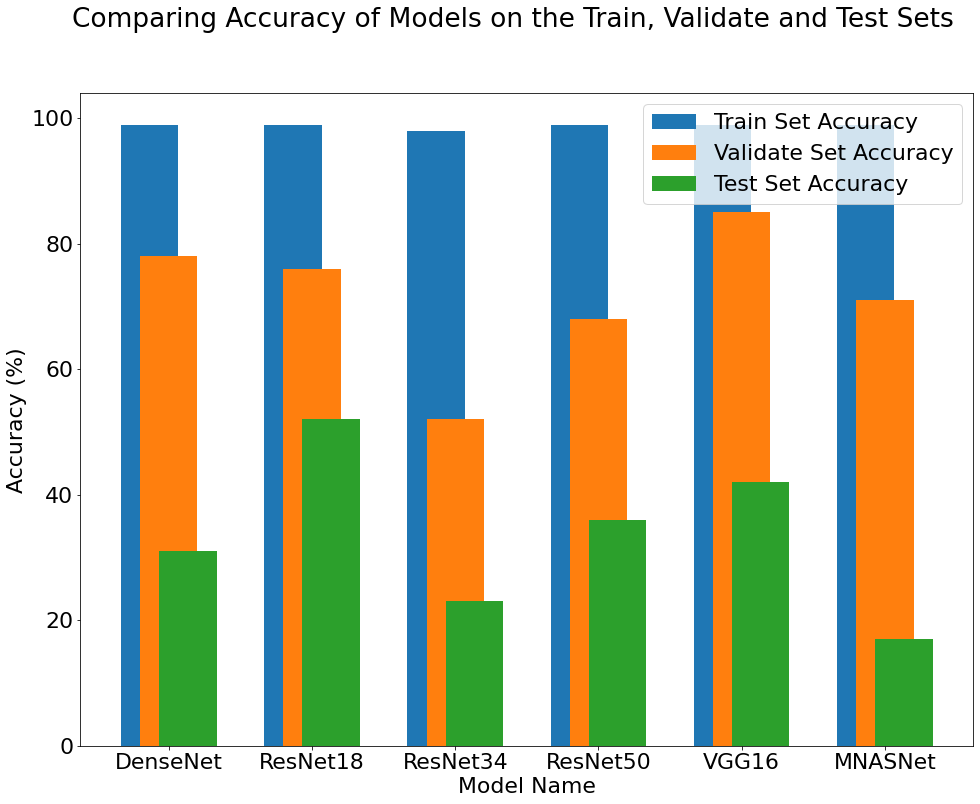

In [10]:
width = 0.4
x_ticks = np.arange(len(no_reg_accuracies))

fig, ax = plt.subplots(figsize=(16,12))
ax.bar(x_ticks - width / 3, train_accuracies.values(), width, label = "Train Set Accuracy")
ax.bar(x_ticks, val_accuracies.values(), width, label = "Validate Set Accuracy")
ax.bar(x_ticks + width / 3, no_reg_accuracies.values(), width, label = "Test Set Accuracy")
ax.set_xticks(x_ticks)
ax.set_xticklabels(no_reg_accuracies.keys())
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Model Name")
ax.legend()
fig.suptitle("Comparing Accuracy of Models on the Train, Validate and Test Sets", wrap=True)
plt.savefig("train-validate-test.png")